In [1]:
import pandas as pd
babies = pd.read_csv("babies23.txt", delim_whitespace=True)
import seaborn as sns

In [2]:
babies.columns

Index(['id', 'pluralty', 'outcome', 'date', 'gestation', 'sex', 'wt', 'parity',
       'race', 'age', 'ed', 'ht', 'wt.1', 'drace', 'dage', 'ded', 'dht', 'dwt',
       'marital', 'inc', 'smoke', 'time', 'number'],
      dtype='object')

In [3]:
babies.drop(['outcome', 'pluralty','sex'], axis = 1)

,id,date,gestation,wt,parity,race,age,ed,ht,wt.1,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,1411,284,120,1,8,27,5,62,100,8,31,5,65,110,1,1,0,0,0
1,20,1499,282,113,2,0,33,5,64,135,0,38,5,70,148,1,4,0,0,0
2,58,1576,279,128,1,0,28,2,64,115,5,32,1,99,999,1,2,1,1,1
3,61,1504,999,123,2,0,36,5,69,190,3,43,4,68,197,1,8,3,5,5
4,72,1425,282,108,1,0,23,5,67,125,0,24,5,99,999,1,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,9153,1672,275,113,0,0,27,5,60,100,0,32,4,72,190,1,4,0,0,0
1232,9163,1712,265,128,1,0,24,5,67,120,0,24,5,73,170,1,3,0,0,0
1233,9213,1672,291,130,4,1,30,2,65,150,2,30,5,70,180,1,3,1,1,2
1234,9229,1680,281,125,0,0,21,4,65,110,0,27,5,71,165,1,1,0,0,0


0     535
7     244
5     138
3      63
4      59
1      46
8      44
6      40
2      29
9      25
10     12
99      1
Name: race, dtype: int64

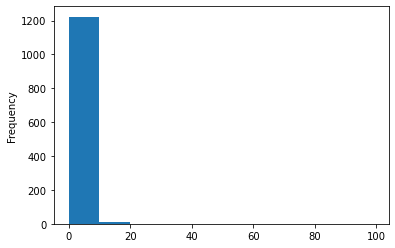

In [50]:
column_obs = 'race'
babies[column_obs].plot(kind = 'hist')
babies[column_obs].value_counts()

## Rows removed because they were all the same

In [5]:
print("Min of 'pluralty': " + str(babies['pluralty'].min()))
print("Max of 'pluralty': " + str(babies['pluralty'].max()))
print("---------------------")
print("Min of 'outcome': " + str(babies['outcome'].min()))
print("Max of 'outcome': " + str(babies['outcome'].max()))
print("---------------------")
print("Min of 'sex': " + str(babies['sex'].min()))
print("Max of 'sex': " + str(babies['sex'].max()))

Min of 'pluralty': 5
Max of 'pluralty': 5
---------------------
Min of 'outcome': 1
Max of 'outcome': 1
---------------------
Min of 'sex': 1
Max of 'sex': 1


## Some variables that might be cool to explore
- 'race' has a few half that is the same and half isn't, not bad
- 'age'/'dage' has a lot of good data with decent variation
- 'race'/'drace'   " "
- 'ed'/'ded', like age, has a lots of different results

## Probably not a good idea to explore
- 'marital' has some interesting data, but only about 20 rows of it
- 'pluralty', 'outcome', and 'sex' were all removed cause they were all the same number for each row

In [6]:
babies.marital.value_counts()

1    1208
2      15
5       6
3       5
0       2
Name: marital, dtype: int64

In [7]:
babies.marital.value_counts()

1    1208
2      15
5       6
3       5
0       2
Name: marital, dtype: int64

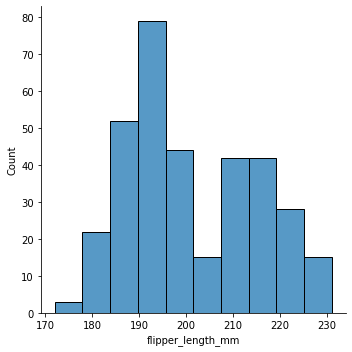

In [8]:
penguins = sns.load_dataset("penguins")
sns.displot(data=penguins, x="flipper_length_mm")

In [48]:
babies_clean = babies[babies.smoke < 2]
babies_clean = babies_clean[babies_clean.race < 99]

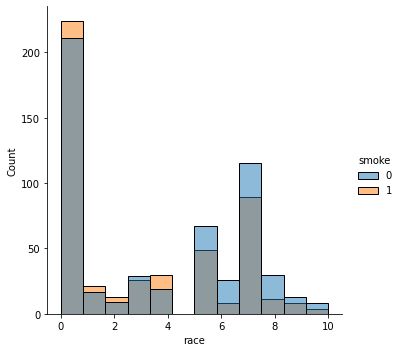

In [74]:
sns.displot(data = babies_clean,
                x='race',
                hue='smoke',
                kind = 'hist')

## White people smoke more often than not
- **and their smoking habits aren't similar to non-white**

In [87]:
print("Percentage of white who smoke: " + str(round(babies_clean[babies_clean['race']<6]['smoke'].mean()*100,2))+'%')
print("Percentage of non-white who smoke: " + str(round(babies_clean[babies_clean['race']>=6]['smoke'].mean()*100,2))+'%')

Percentage of white who smoke: 50.77%
Percentage of non-white who smoke: 38.46%


## Non-white is under-represented

In [89]:
# rows of white
print('white in study: ' + str(babies['race'].value_counts(sort = False)[:6].sum()))
# rows of non-white
print('non-white in study: ' + str(babies['race'].value_counts(sort = False)[6:-1].sum()))

white in study: 870
non-white in study: 365


In [70]:
babies['race'].value_counts(sort = False)[6:-1]

6      40
7     244
8      44
9      25
10     12
Name: race, dtype: int64